In [21]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#data2 = data[data['user'] == '1206paul_']
data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Martin_Gales']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Trizze']





# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats.head(10)

,total_messages,watch_length,stream_length
stream,,,
67,211,23296.0,23469.0
25,105,35147.0,36105.0
72,104,19839.0,19854.0
73,101,18472.0,18507.0
71,87,21261.0,21345.0
49,87,22521.0,22548.0
60,86,18002.0,18233.0
62,84,18447.0,18477.0
20,79,17236.0,17472.0


In [22]:
stream_stats.describe()

,total_messages,watch_length,stream_length
count,74.000000,74.000000,74.000000
mean,47.297297,18124.729730,18625.837838
std,30.447678,5272.715828,5237.517223
min,5.000000,2861.000000,5257.000000
25%,26.000000,16010.000000,17047.500000
50%,43.000000,18053.500000,18492.000000
75%,59.000000,20844.500000,21255.250000
max,211.000000,35147.000000,36105.000000


In [23]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
stream,,,,,
67,211,23296.0,23469.0,6.471111,6.519167
25,105,35147.0,36105.0,9.763056,10.029167
72,104,19839.0,19854.0,5.510833,5.515000
73,101,18472.0,18507.0,5.131111,5.140833
71,87,21261.0,21345.0,5.905833,5.929167


In [24]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100

stream_stats.head(5)



,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
67,211,23296.0,23469.0,6.471111,6.519167,99.262857
25,105,35147.0,36105.0,9.763056,10.029167,97.346628
72,104,19839.0,19854.0,5.510833,5.515000,99.924448
73,101,18472.0,18507.0,5.131111,5.140833,99.810882
71,87,21261.0,21345.0,5.905833,5.929167,99.606465


In [25]:
stream_stats['persenteg'].describe()

count    74.000000
mean     96.783814
std       6.116831
min      54.422675
25%      96.807330
50%      98.915919
75%      99.666529
max      99.924448
Name: persenteg, dtype: float64

In [26]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)


,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
50,17,2861.0,5257.0,0.794722,1.460278,54.422675
3,22,14924.0,17451.0,4.145556,4.847500,85.519454
37,50,23739.0,27145.0,6.594167,7.540278,87.452570
41,12,6857.0,7832.0,1.904722,2.175556,87.551073
63,37,16325.0,18507.0,4.534722,5.140833,88.209867
56,9,19297.0,21863.0,5.360278,6.073056,88.263276
7,22,15999.0,17773.0,4.444167,4.936944,90.018567
22,13,11429.0,12616.0,3.174722,3.504444,90.591313
69,24,16314.0,18002.0,4.531667,5.000556,90.623264


In [27]:
stream_stats['watch_length_in_hour'].sum() /24

15.52349537037037

In [28]:
stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
38,0,33,17532.0,17697.0,4.870000,4.915833,99.067639
13,1,25,16994.0,17831.0,4.720556,4.953056,95.305928
24,2,37,18697.0,19147.0,5.193611,5.318611,97.649762
1,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
9,4,23,17458.0,18734.0,4.849444,5.203889,93.188854
26,5,76,20013.0,20382.0,5.559167,5.661667,98.189579
20,6,23,16043.0,16563.0,4.456389,4.600833,96.860472
6,7,22,15999.0,17773.0,4.444167,4.936944,90.018567
36,8,55,18475.0,18686.0,5.131944,5.190556,98.870812
14,9,43,15648.0,16418.0,4.346667,4.560556,95.310026


In [29]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
63,64,59,18253.0,18293.0,5.070278,5.081389,99.781337
30,65,54,17878.0,18147.0,4.966111,5.040833,98.517661
55,66,43,23323.0,23400.0,6.478611,6.500000,99.670940
44,67,211,23296.0,23469.0,6.471111,6.519167,99.262857
46,68,60,18392.0,18515.0,5.108889,5.143056,99.335674
8,69,24,16314.0,18002.0,4.531667,5.000556,90.623264
71,70,64,26810.0,26839.0,7.447222,7.455278,99.891948
52,71,87,21261.0,21345.0,5.905833,5.929167,99.606465
73,72,104,19839.0,19854.0,5.510833,5.515000,99.924448
64,73,101,18472.0,18507.0,5.131111,5.140833,99.810882


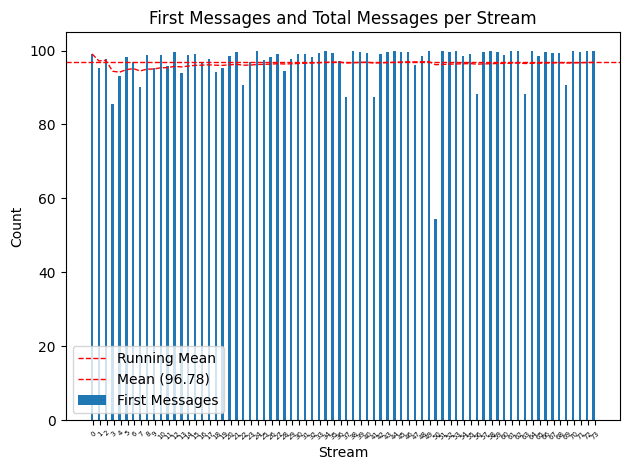

In [30]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats['stream'], fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()
